In [47]:
# this allows plots to appear directly in the notebook
%matplotlib inline

# Import the libraries required
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as linear
import numpy as np

In [17]:
# olympics = pd.read_csv("Olympics18962012.csv", index_col= "City")
olympics = pd.read_csv("Olympics18962012.csv")
olympics

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
8,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze
9,Athens,1896,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400m freestyle,M,Gold


In [18]:
olympics.dtypes

City            object
Edition          int64
Sport           object
Discipline      object
Athlete         object
NOC             object
Gender          object
Event           object
Event_gender    object
Medal           object
dtype: object

In [19]:
olympics.isnull().sum()

City            0
Edition         0
Sport           0
Discipline      0
Athlete         0
NOC             0
Gender          0
Event           0
Event_gender    0
Medal           0
dtype: int64

In [20]:
olympics.describe(include = 'all')

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
count,31150,31150.000000,31150,31150,31150,31150,31150,31150,31150,31150
unique,22,NaN,42,56,22776,145,2,596,3,3
top,London,NaN,Aquatics,Athletics,"PHELPS, Michael",USA,Men,football,M,Gold
freq,3552,NaN,4171,3623,22,4578,22740,1495,21055,10482
mean,NaN,1970.462793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,33.153877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1948.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# numbers of medals per country
olympics.NOC.value_counts()

USA    4578
URS    2049
GBR    1720
FRA    1391
GER    1304
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     804
JPN     789
RUS     775
CAN     647
ROU     640
NOR     555
KOR     527
POL     511
DEN     507
FRG     490
FIN     456
ESP     442
YUG     435
BRA     431
BEL     411
CUB     410
SUI     380
BUL     333
TCH     329
       ... 
AFG       2
ZAM       2
LUX       2
ECU       2
KUW       2
SUR       2
MRI       1
BOT       1
BDI       1
TOG       1
DJI       1
SUD       1
AHO       1
GUA       1
BER       1
GUY       1
GAB       1
IRQ       1
ERI       1
GRN       1
CYP       1
MKD       1
CIV       1
UAE       1
NIG       1
TGA       1
SEN       1
ISV       1
BAR       1
BRN       1
Name: NOC, dtype: int64

In [91]:
USA = olympics[olympics.NOC == "USA"]
USA

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
11,Athens,1896,Athletics,Athletics,"LANE, Francis",USA,Men,100m,M,Bronze
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
19,Athens,1896,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500m,M,Silver
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold
22,Athens,1896,Athletics,Athletics,"JAMISON, Herbert",USA,Men,400m,M,Silver
27,Athens,1896,Athletics,Athletics,"GARRETT, Robert",USA,Men,discus throw,M,Gold
29,Athens,1896,Athletics,Athletics,"CLARK, Ellery",USA,Men,high jump,M,Gold
30,Athens,1896,Athletics,Athletics,"CONNOLLY, James",USA,Men,high jump,M,Silver
31,Athens,1896,Athletics,Athletics,"GARRETT, Robert",USA,Men,high jump,M,Silver


KeyError: 'Medal'

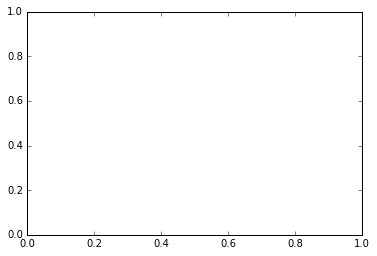

In [99]:
USA.groupby(['Edition','Medal']).Medal.count()

Edition  Medal 
1896     Bronze      2
         Gold       11
         Silver      7
1900     Bronze     14
         Gold       27
         Silver     14
1904     Bronze    111
         Gold      146
         Silver    137
1908     Bronze     15
         Gold       34
         Silver     14
1912     Bronze     31
         Gold       45
         Silver     25
1920     Bronze     38
         Gold      110
         Silver     45
1924     Bronze     51
         Gold      110
         Silver     37
1928     Bronze     17
         Gold       43
         Silver     24
1932     Bronze     59
         Gold       78
         Silver     44
1936     Bronze     15
         Gold       51
         Silver     26
                  ... 
1972     Bronze     43
         Gold       53
         Silver     59
1976     Bronze     36
         Gold       63
         Silver     56
1984     Bronze     50
         Gold      168
         Silver    115
1988     Bronze     52
         Gold       77
         Silver   

In [23]:
olympics[olympics.NOC == "AUS"]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
18,Athens,1896,Athletics,Athletics,"FLACK, Edwin",AUS,Men,1500m,M,Gold
24,Athens,1896,Athletics,Athletics,"FLACK, Edwin",AUS,Men,800m,M,Gold
158,Paris,1900,Aquatics,Swimming,"LANE, Frederick C.V.",AUS,Men,200m freestyle,M,Gold
161,Paris,1900,Aquatics,Swimming,"LANE, Frederick C.V.",AUS,Men,200m obstacle event,M,Gold
230,Paris,1900,Athletics,Athletics,"ROWLEY, Stanley",AUS,Men,100m,M,Bronze
239,Paris,1900,Athletics,Athletics,"ROWLEY, Stanley",AUS,Men,200m,M,Bronze
267,Paris,1900,Athletics,Athletics,"ROWLEY, Stanley",AUS,Men,60m,M,Bronze
2846,Antwerp,1920,Aquatics,Swimming,"BEAUREPAIRE, Frank E.",AUS,Men,1500m freestyle,M,Bronze
2881,Antwerp,1920,Aquatics,Swimming,"BEAUREPAIRE, Frank E.",AUS,Men,4x200m freestyle relay,M,Silver
2882,Antwerp,1920,Aquatics,Swimming,"HAY, Henry",AUS,Men,4x200m freestyle relay,M,Silver


In [24]:
olympics[olympics.NOC == "MAS"]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
20028,Barcelona,1992,Badminton,Badminton,"SIDEK, Rashid",MAS,Men,doubles,M,Bronze
20029,Barcelona,1992,Badminton,Badminton,"SIDEK, Razif",MAS,Men,doubles,M,Bronze
21774,Atlanta,1996,Badminton,Badminton,"CHEAH, Soon Kit",MAS,Men,doubles,M,Silver
21775,Atlanta,1996,Badminton,Badminton,"YAP, Kim Hock",MAS,Men,doubles,M,Silver
21786,Atlanta,1996,Badminton,Badminton,"SIDEK, Rashid",MAS,Men,singles,M,Bronze
27742,Beijing,2008,Badminton,Badminton,"LEE, Chong Wei",MAS,Men,singles,M,Silver
29219,London,2012,Aquatics,Diving,"RINONG, Pandelela",MAS,Women,10m platform,W,Bronze
29778,London,2012,Badminton,Badminton,"LEE, Chong Wei",MAS,Men,singles,M,Silver


In [88]:
# the most successful olympian
olympics.Athlete.value_counts()

PHELPS, Michael                 22
LATYNINA, Larisa                18
ANDRIANOV, Nikolay              15
ONO, Takashi                    13
MANGIAROTTI, Edoardo            13
SHAKHLIN, Boris                 13
KATO, Sawao                     12
COUGHLIN, Natalie               12
NEMOV, Alexei                   12
FISCHER, Birgit                 12
THOMPSON, Jenny                 12
TORRES, Dara                    12
NURMI, Paavo                    12
LOCHTE, Ryan                    11
CHUKARIN, Viktor Ivanovich      11
OSBURN, Carl Townsend           11
SPITZ, Mark                     11
BIONDI, Matthew                 11
CASLAVSKA, Vera                 11
GEREVICH, Aladar                10
KELETI, Agnes                   10
LEWIS, Carl                     10
HALL, Gary Jr.                  10
SCHERBO, Vitaly                 10
NAKAYAMA, Akinori               10
DITYATIN, Aleksandr             10
ASTAKHOVA, Polina               10
VAN ALMSICK, Franziska          10
VEZZALI, Valentina  

In [26]:
olympics[olympics.Medal == 'Gold'].Athlete.value_counts()

PHELPS, Michael                    18
NURMI, Paavo                        9
SPITZ, Mark                         9
LEWIS, Carl                         9
LATYNINA, Larisa                    9
FISCHER, Birgit                     8
KATO, Sawao                         8
BIONDI, Matthew                     8
THOMPSON, Jenny                     8
EWRY, Ray                           8
ANDRIANOV, Nikolay                  7
GEREVICH, Aladar                    7
CASLAVSKA, Vera                     7
SHAKHLIN, Boris                     7
CHUKARIN, Viktor Ivanovich          7
VAN DYKEN, Amy                      6
HOY, Chris                          6
KARPATI, Rudolf                     6
VAN INNIS, Hubert                   6
KOVACS, Pal Adam                    6
MANGIAROTTI, Edoardo                6
BOLT, Usain                         6
OTTO, Kristin                       6
SCHERBO, Vitaly                     6
FREDRIKSSON, Gert                   6
KLIMKE, Reiner                      6
NAKAYAMA, Ak

In [27]:
olympics[olympics.Athlete == 'PHELPS, Michael']

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
25225,Athens,2004,Aquatics,Swimming,"PHELPS, Michael",USA,Men,100m butterfly,M,Gold
25253,Athens,2004,Aquatics,Swimming,"PHELPS, Michael",USA,Men,200m butterfly,M,Gold
25258,Athens,2004,Aquatics,Swimming,"PHELPS, Michael",USA,Men,200m freestyle,M,Bronze
25265,Athens,2004,Aquatics,Swimming,"PHELPS, Michael",USA,Men,200m individual medley,M,Gold
25277,Athens,2004,Aquatics,Swimming,"PHELPS, Michael",USA,Men,400m individual medley,M,Gold
25286,Athens,2004,Aquatics,Swimming,"PHELPS, Michael",USA,Men,4x100m freestyle relay,M,Bronze
25325,Athens,2004,Aquatics,Swimming,"PHELPS, Michael",USA,Men,4x100m medley relay,M,Gold
25361,Athens,2004,Aquatics,Swimming,"PHELPS, Michael",USA,Men,4x200m freestyle relay,M,Gold
27224,Beijing,2008,Aquatics,Swimming,"PHELPS, Michael",USA,Men,100m butterfly,M,Gold
27252,Beijing,2008,Aquatics,Swimming,"PHELPS, Michael",USA,Men,200m butterfly,M,Gold


In [28]:
# the most successful olympian for Australia
olympics[(olympics.NOC == 'AUS') & (olympics.Medal == 'Gold')].Athlete.value_counts()

THORPE, Ian                             5
CUTHBERT, Betty                         4
ROSE, Murray                            4
FRASER, Dawn                            4
TOMKINS, James                          3
HACKETT, Grant                          3
JONES, Leisel                           3
HAWKES, Rechelle                        3
GOULD, Shane                            3
THOMAS, Petria                          3
RICE, Stephanie                         3
TRICKETT, Lisbeth                       3
HENRY, Jodie                            3
STRICKLAND-DE LA HUNTY, Shirley         3
RYAN, Matthew Morgan                    3
HOY, Andrew                             3
GINN, Drew                              3
MEARES, Anna                            2
DIAMOND, Michael                        2
HASLAM, Juliet                          2
PAGE, Malcolm                           2
SEEBOHM, Emily                          2
WENDEN, Michael Vincent                 2
MORGAN, Laurence Robert           

In [89]:
# numbers of medals per country
olympics.groupby(['NOC', 'Medal']).Medal.count()

NOC  Medal 
AFG  Bronze       2
AHO  Silver       1
ALG  Bronze       8
     Gold         5
     Silver       2
ANZ  Bronze       5
     Gold        20
     Silver       4
ARG  Bronze      91
     Gold        69
     Silver      99
ARM  Bronze       9
     Gold         1
     Silver       2
AUS  Bronze     472
     Gold       311
     Silver     406
AUT  Bronze      44
     Gold        21
     Silver      81
AZE  Bronze      15
     Gold         6
     Silver       5
BAH  Bronze       5
     Gold        13
     Silver       9
BAR  Bronze       1
BDI  Gold         1
BEL  Bronze     152
     Gold        91
               ... 
UKR  Bronze      90
     Gold        41
     Silver      43
URS  Bronze     584
     Gold       838
     Silver     627
URU  Bronze      30
     Gold        44
     Silver       2
USA  Bronze    1097
     Gold      2231
     Silver    1250
UZB  Bronze      10
     Gold         5
     Silver       5
VEN  Bronze       8
     Gold         2
     Silver       2
VIE  Sil

In [90]:
olympics.groupby(['Edition', 'City', 'NOC', 'Medal']).Medal.count()

Edition  City    NOC  Medal 
1896     Athens  AUS  Gold        2
                 AUT  Bronze      2
                      Gold        2
                      Silver      1
                 DEN  Bronze      3
                      Gold        1
                      Silver      2
                 FRA  Bronze      2
                      Gold        5
                      Silver      4
                 GBR  Bronze      2
                      Gold        2
                      Silver      3
                 GER  Bronze      2
                      Gold       26
                      Silver      5
                 GRE  Bronze     22
                      Gold       10
                      Silver     20
                 HUN  Bronze      3
                      Gold        2
                      Silver      1
                 SUI  Gold        1
                      Silver      2
                 USA  Bronze      2
                      Gold       11
                      Silver      7

In [38]:
Athens_1896 = olympics[olympics.Edition == 1896]
Athens_1896

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
8,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze
9,Athens,1896,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400m freestyle,M,Gold


In [60]:
Athens_1896.groupby(['NOC', 'Medal']).Medal.count()

NOC  Medal 
AUS  Gold       2
AUT  Bronze     2
     Gold       2
     Silver     1
DEN  Bronze     3
     Gold       1
     Silver     2
FRA  Bronze     2
     Gold       5
     Silver     4
GBR  Bronze     2
     Gold       2
     Silver     3
GER  Bronze     2
     Gold      26
     Silver     5
GRE  Bronze    22
     Gold      10
     Silver    20
HUN  Bronze     3
     Gold       2
     Silver     1
SUI  Gold       1
     Silver     2
USA  Bronze     2
     Gold      11
     Silver     7
ZZX  Bronze     2
     Gold       2
     Silver     2
Name: Medal, dtype: int64

In [73]:
# three_colors = {'Gold':'gold', 'Silver':'silver'}
# three_colors = np.array(['gold', 'silver', 'brown'])

In [75]:
# Athens_1896.groupby(['NOC', 'Medal']).Medal.count().plot.bar(color = three_colors)

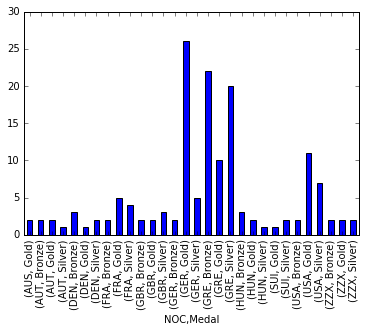

In [74]:
Athens_1896.groupby(['NOC', 'Medal']).Medal.count().plot.bar()

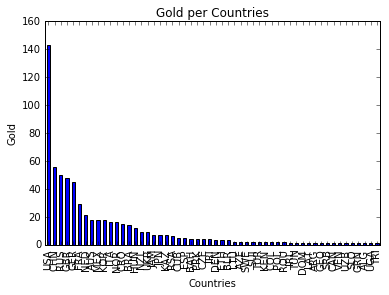

In [26]:
olympics[(olympics.Edition == 2012) & (olympics.Medal == 'Gold')].NOC.value_counts().plot(kind='bar', title='Gold per Countries')
mp.xlabel('Countries')
mp.ylabel('Gold')

# Things that I need to do:

1. Way of making team event as an individual event
2. construct medal table according to edition and NOC

In [25]:
medal_tree = olympics.drop(['City', 'Edition', 'Sport', 'Athlete', 'Gender', 'Event', 'Event_gender'], axis=1)
medal_tree

,Discipline,NOC,Medal
0,Swimming,HUN,Gold
1,Swimming,AUT,Silver
2,Swimming,GRE,Bronze
3,Swimming,GRE,Gold
4,Swimming,GRE,Silver
5,Swimming,GRE,Bronze
6,Swimming,HUN,Gold
7,Swimming,GRE,Silver
8,Swimming,GRE,Bronze
9,Swimming,AUT,Gold


In [ ]:
# need to assign discipline & NOC with numerical variables?

In [20]:
import sklearn.tree as st

In [21]:
classifier = st.DecisionTreeClassifier(criterion='gini', max_depth=1)

In [24]:
classifier.fit(medal_tree[['Discipline', 'NOC']], medal_tree[['Medal']])

ValueError: could not convert string to float: EST